Zadanie 1.

In [1]:
import pygad
import numpy
import pandas

d = {
    'przedmiot': ['zegar', 'obraz-pejzaż', 'obraz-portret', 'radio', 'laptop', 'lampka nocna', 'srebrne sztućce', 'procelana', 'figura z brązu', 'skórzana torebka', 'odkurzacz'], 
    'wartosc': [100, 300, 200, 40, 500, 70, 100, 250, 300, 280, 300], 
    'waga': [7, 7, 6, 2, 5, 6, 1, 3, 10, 3, 15]
    }
df = pandas.DataFrame(data=d)
print(df)

weight_limit = 25

#definiujemy parametry chromosomu
#geny to liczby: 0 lub 1
gene_space = [0, 1]

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 10
num_genes = len(df['przedmiot'])

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 5
num_generations = 30
keep_parents = 2

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 8

           przedmiot  wartosc  waga
0              zegar      100     7
1       obraz-pejzaż      300     7
2      obraz-portret      200     6
3              radio       40     2
4             laptop      500     5
5       lampka nocna       70     6
6    srebrne sztućce      100     1
7          procelana      250     3
8     figura z brązu      300    10
9   skórzana torebka      280     3
10         odkurzacz      300    15


In [ ]:
#definiujemy funkcję fitness
def fitness_func(instance, solution, solution_idx):
    if numpy.sum(solution * df['waga']) > weight_limit:
        return 0
    return numpy.sum(solution * df['wartosc'])

fitness_function = fitness_func

In [ ]:
#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

#uruchomienie algorytmu
ga_instance.run()

In [ ]:
#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

#tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
prediction = numpy.sum(df['wartosc']*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

Zadanie 2.

In [ ]:
#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria='reach_1600')

#uruchomienie algorytmu
import time
start = time.time()
ga_instance.run()
end = time.time()
print(f"Time elapsed: {end - start}")

#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

#tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
prediction = numpy.sum(df['wartosc']*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))
print(f"Generations completed: {ga_instance.generations_completed}")


#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()


In [ ]:
import time

ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria='reach_1600')

n = 10
time_sum = 0
for i in range(n):
    start = time.time()
    ga_instance.run()
    end = time.time()
    time_sum += end-start

print(f"Avarage time: {time_sum/10 * 1000}")


Zadanie 3.

In [ ]:
import math

def endurance(x, y, z, u, v, w):
    return math.exp(-2*(y-math.sin(x))**2)+math.sin(z*u)+math.cos(v*w)

In [ ]:
import pygad


#definiujemy parametry chromosomu
gene_space = {'low': 0, 'high': 1}

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 20
num_genes = 6

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 10
num_generations = 50
keep_parents = 4

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 17

In [ ]:
#definiujemy funkcję fitness
def fitness_func(instance, solution, solution_idx):
    return endurance(*solution)

fitness_function = fitness_func

In [ ]:
#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

#uruchomienie algorytmu
ga_instance.run()

#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

#tutaj dodatkowo wyswietlamy sume wskazana przez jedynki
prediction = endurance(*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()

Zadanie 4.

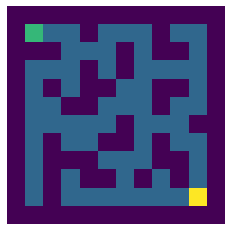

In [1]:
import matplotlib.pyplot as plt

maze_dict = {
    '*': 0,
    ' ': 1,
    'x': 2,
    'y': 3
}


maze = []
with open('maze.txt', 'r') as f:
    for line in f:
        row = []
        for i in line.rstrip():
            row.append(maze_dict[i])
        maze.append(row)

        
plt.axis('off')
plt.imshow(maze)

In [6]:
import pygad


#definiujemy parametry chromosomu
# 0 - N
# 1 = S
# 2 = W
# 3 = E
gene_space = [0, 1, 2, 3]

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 100
num_genes = 30

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac (kilka procent)
num_parents_mating = 50
num_generations = 500
keep_parents = 10

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
parent_selection_type = "sss"

#w il =u punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#trzeba pamietac ile genow ma chromosom
mutation_type = "random"
mutation_percent_genes = 5

In [8]:
import copy
import matplotlib.animation as anim
import numpy as np


def move(position, direction):
    if direction == 0:
        return (position[0] - 1, position[1])
    if direction == 1:
        return (position[0] + 1, position[1])
    if direction == 2:
        return (position[0], position[1] - 1)
    if direction == 3:
        return (position[0], position[1] + 1)        

maze_cpy = copy.deepcopy(maze)

#definiujemy funkcję fitness
def fitness_func(instance, solution, solution_idx):
    global maze_cpy
    maze_cpy = copy.deepcopy(maze)
    position = (1, 1)
    fitness = 0
    steps = 0
    for step in solution:
        new_position = move(position, step)
        if maze_cpy[new_position[0]][new_position[1]] == 3:
            return 100 + fitness - steps
        if maze_cpy[new_position[0]][new_position[1]] == 0:
            fitness -= 1
        elif maze_cpy[new_position[0]][new_position[1]] == 4 or maze_cpy[new_position[0]][new_position[1]] == 2:
            fitness -= 1
        else:
            fitness += 1
            maze_cpy[new_position[0]][new_position[1]] = 4
            position = new_position
            steps += 1
    return fitness


fitness_function = fitness_func

In [12]:
#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

#uruchomienie algorytmu
ga_instance.run()

No handles with labels found to put in legend.


Parameters of the best solution : [3. 3. 1. 3. 3. 0. 3. 3. 2. 1. 1. 1. 2. 1. 3. 1. 3. 3. 1. 3. 1. 1. 1. 1.
 2. 1. 3. 1. 0. 2.]
Fitness value of the best solution = 99


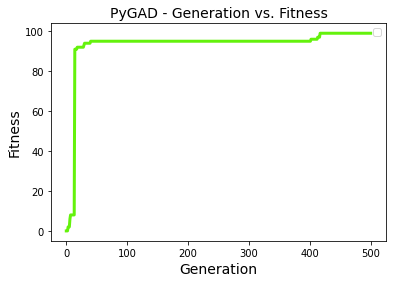

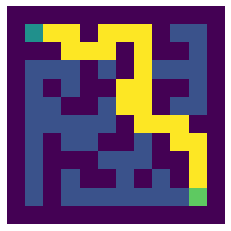

In [13]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()
fitness_func(0, solution, 0)
plt.axis('off')
plt.imshow(maze_cpy)


In [21]:
import time


#inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       stop_criteria='reach_80')


n = 10
time_sum = 0
for i in range(n):
    start = time.time()
    ga_instance.run()
    end = time.time()
    time_sum += end-start

print(f"Avarage time: {time_sum/10 * 1000}")


Avarage time: 66.22216701507568
